In [40]:
##Dependencies 
import pandas as pd 
from matplotlib import pyplot as plt
from scipy import stats as sts
import numpy as np

In [4]:
### Bring in the dataset

bcorp = pd.read_csv('bcorp.csv')
bcorp.head()

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,"CPI Risk, Finance & Governance",1/13/2017,1/13/2017,certified,CPI is the professional services organisation ...,Management and Financial Consulting,Business Products & Services,"Professional services in risk, finance and gov...",Netherlands,Noord-Holland,...,NaN,2.2,2.3,NaN,2.0,NaN,NaN,2.7,NaN,1
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,E-Waste Solutions,6/8/2017,6/8/2017,certified,A market solution that seeks to reduce the env...,Recycling Services & Waste Management,Energy & Environmental Services,"collection, recovery and reuse of electrical a...",Colombia,Bogotá D.C.,...,1.1,NaN,1.6,0.8,3.2,NaN,NaN,3.7,NaN,1
4,LUMNI CHILE,8/24/2012,7/11/2017,certified,Lumni is a new kind of financial services comp...,Other,Financial Services,Equity Social Investments & Higher Education F...,Chile,Santiago,...,0.2,NaN,0.0,0.0,2.2,NaN,NaN,0.0,NaN,1


In [5]:
bcorp_US = bcorp[bcorp.country == "United States"]
for col in bcorp_US:
    print(col)

company_name
date_first_certified
date_certified
current_status
description
industry
industry_category
products_and_services
country
state
city
sector
size
b_corp_profile
website
assessment_year
overall_score
impact_area_community
impact_area_customers
impact_area_environment
impact_area_governance
impact_area_workers
impact_area_community_na_score
impact_area_customers_na_score
impact_area_environment_na_score
impact_area_governance_na_score
impact_area_workers_na_score
ia_community_it_civic_engagement_giving
ia_community_it_designed_for_charitable_giving
ia_community_it_designed_to_give
ia_community_it_diversity_inclusion
ia_community_it_job_creation
ia_community_it_local_economic_development
ia_community_it_local_involvement
ia_community_it_microdistribution_poverty_alleviation
ia_community_it_microfranchise_poverty_alleviation
ia_community_it_national_economic_development
ia_community_it_producer_cooperative
ia_community_it_suppliers_distributors
ia_community_it_suppliers_distribut

In [6]:
bcorp_US_cleaned = bcorp_US.drop(['website', 'b_corp_profile', 'description', 
                                  'industry', 'industry_category', 'products_and_services',
                                  'country', 'state', 'city', 'sector', 'size', 'impact_area_community_na_score',
                                 'impact_area_customers_na_score', 'impact_area_environment_na_score', 'impact_area_governance_na_score',
                                 'impact_area_workers_na_score'], axis = 1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [7]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_community_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [8]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_customers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [9]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_environment_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [10]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_workers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,ia_governance_it_corporate_accountability,ia_governance_it_ethics,ia_governance_it_governance,ia_governance_it_mission_engagement,ia_governance_it_mission_locked,ia_governance_it_transparency,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,NaN,0.0,NaN,NaN,4.0,2.5,3.5,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,0.0,NaN,NaN,NaN,1.9,2.5,3.5,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,NaN,0.0,NaN,NaN,1.7,7.5,3.5,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,NaN,NaN,NaN,NaN,3.7,10.0,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,NaN,0.0,NaN,NaN,1.5,2.5,1.3,2


In [11]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_governance_it' in col],axis=1)
bcorp_US_cleaned.nunique()

company_name               1817
date_first_certified       1288
date_certified             1751
current_status                2
assessment_year              14
overall_score               627
impact_area_community       629
impact_area_customers       572
impact_area_environment     545
impact_area_governance      206
impact_area_workers         396
certification_cycle           6
dtype: int64

In [12]:
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,0.0,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,NaN,2


## Assessing relative impact of each impact area on the overall score

#### Relative impact of  "Community" Impact Area on Overall Score

In [114]:
##Run linear regression on Community impact area on overall score
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_community, bcorp_US_cleaned.overall_score)
r
#r squared output tells us community impact area explains approximately 38% of the variation in overall score
regress_values_community = bcorp_US_cleaned.impact_area_community * s + i
line_eq_comm = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_comm

'y = 0.44x + 84.38'

#### Relative impact of "governance" Impact area on overall score

In [92]:
##Governance linregress
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_governance, bcorp_US_cleaned.overall_score)
r
regress_values_gov = bcorp_US_cleaned.impact_area_governance * s + i
line_eq_gov = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_gov

'y = 0.97x + 84.99'

#### Relative impact of "Environment" Impact Area on Overall Score

In [94]:
##Environment linregress
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_environment, bcorp_US_cleaned.overall_score)
r
regress_values_env = bcorp_US_cleaned.impact_area_environment * s + i
line_eq_env = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_env

'y = 0.19x + 94.38'

#### Relative Impact of "Workers" Impact Area on Overall Score

In [115]:
##Workers linregress
# (s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_workers, bcorp_US_cleaned.overall_score)
# r
# regress_values_work = bcorp_US_cleaned.impact_area_workers * s + i
# line_eq_work = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
workers_array = bcorp_US_cleaned.impact_area_workers.to_numpy(dtype = int)
nan_array_work = np.isnan(workers_array)
not_nan_array_work = ~ nan_array_work
workers_nonan = workers_array[not_nan_array_work]
workers_nonan
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(workers_nonan, overallscore_array)
rvalue

##Workers linregress
regress_values_workers = workers_nonan * s + i
line_eq_work = "y = " + str(slope) + "x + " + str(round(intercept,2))
line_eq_work

'y = 2.3128977036523102e-10x + 97.48'

#### Relative Impact of "Customers" Impact Area on Overall Score

In [116]:
#Filter out NaNs from impact area customers series, run regression with it as np array
customers_array = bcorp_US_cleaned['impact_area_customers'].to_numpy(dtype = int)
customers_array
overallscore_array = bcorp_US_cleaned['overall_score'].to_numpy(dtype = int)
overallscore_array
nan_array_cust = np.isnan(customers_array)
not_nan_array_cust = ~ nan_array_cust
customers_nonan = customers_array[not_nan_array_cust]
customers_nonan 
#attempt regression 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(customers_nonan, overallscore_array)
rvalue 
regress_values_customers = customers_nonan * slope + intercept
line_eq_customers = "y = " + str(slope) + "x + " + str(round(intercept,2))
line_eq_customers

'y = 2.450811931862826e-09x + 97.61'

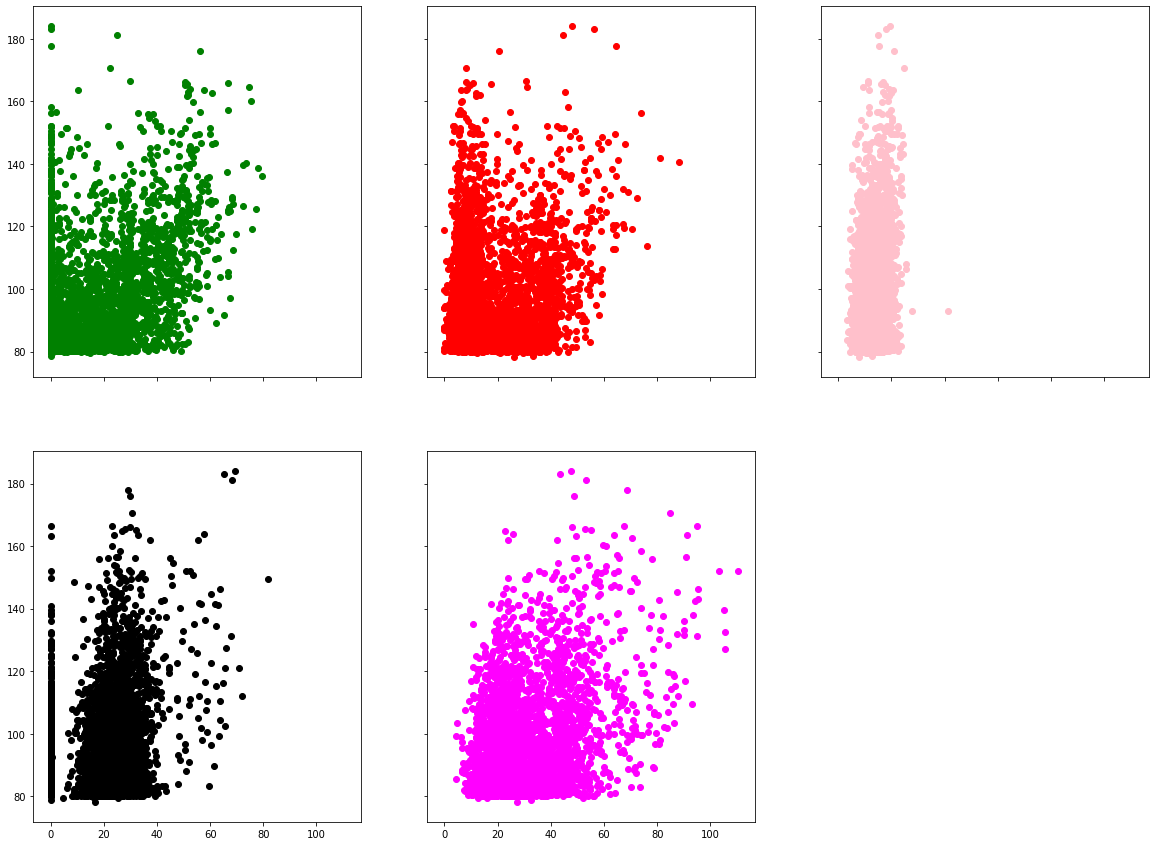

In [117]:
#Scatter plot of community impact area vs overall score
# .corr or numpy polyfit (np.polyfit, lsqregr)
f, axs = plt.subplots(nrows = 2, ncols = 3, sharex = True, sharey = True, figsize = (20,15))
axs[0,0].scatter(bcorp_US_cleaned['impact_area_customers'], bcorp_US_cleaned['overall_score'], color = 'green')
axs[0,1].scatter(bcorp_US_cleaned['impact_area_environment'], bcorp_US_cleaned['overall_score'], color = 'red')
axs[0,2].scatter(bcorp_US_cleaned['impact_area_governance'], bcorp_US_cleaned['overall_score'], color = 'pink')
axs[1,0].scatter(bcorp_US_cleaned['impact_area_workers'], bcorp_US_cleaned['overall_score'], color = 'black')
axs[1,1].scatter(bcorp_US_cleaned['impact_area_community'], bcorp_US_cleaned['overall_score'], color = 'magenta')
f.delaxes(axs[1,2])

In [66]:
## Calculate regression values for each impact area--do it in a function!
## ASK A TA ABOUT THIS! 
def impact_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq

In [69]:
impact_regression(bcorp_US_cleaned['impact_area_environment'], bcorp_US_cleaned['overall_score'])


'y = nanx + nan'

In [71]:
bcorp_US_cleaned['overall_score']

1       115.0
2        90.5
9        90.5
10      120.3
11      116.7
        ...  
6673     84.9
6674     84.4
6682    104.2
6683     95.8
6693     82.5
Name: overall_score, Length: 3390, dtype: float64

In [61]:
#Filter out NaNs from impact area

company_name               3390
date_first_certified       3390
date_certified             3390
current_status             3390
assessment_year            3390
overall_score              3390
impact_area_community      3390
impact_area_customers      3273
impact_area_environment    3390
impact_area_governance     3390
impact_area_workers        3047
certification_cycle        3390
dtype: int64

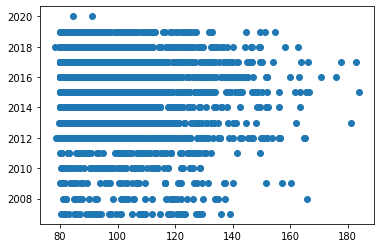

In [36]:
bcorp_US_cleaned 
plt.scatter(bcorp_US_cleaned.overall_score, bcorp_US_cleaned.assessment_year)

plt.show()
